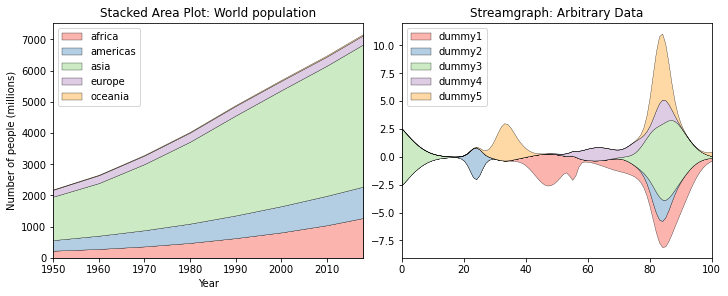

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Pastel1")

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
    'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'europe': [220, 253, 276, 295, 310, 303, 294, 293],
    'oceania': [12, 15, 19, 22, 26, 31, 36, 39],
}

def gaussian_mixture(x, n=5):
    """Return a random mixture of *n* Gaussians, evaluated at positions *x*."""
    def add_random_gaussian(a):
        amplitude = 1 / (.1 + np.random.random())
        dx = x[-1] - x[0]
        x0 = (2 * np.random.random() - .5) * dx
        z = 10 / (.1 + np.random.random()) / dx
        a += amplitude * np.exp(-(z * (x - x0))**2)
    a = np.zeros_like(x)
    for j in range(n):
        add_random_gaussian(a)
    return a


fig, axs = plt.subplots(ncols=2, constrained_layout=True, 
                        figsize=(10, 4))

# stacked area plot
axs[0].stackplot(year, population_by_continent.values(),
                 ec="k", lw=0.3,
                 labels=population_by_continent.keys())
axs[0].legend(loc='upper left')
axs[0].set_xlim(1950, 2018)
axs[0].set_title('Stacked Area Plot: World population')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of people (millions)')

# streamgraph
np.random.seed(20210809)
x = np.linspace(0, 100, 101)
ys = [gaussian_mixture(x) for _ in range(5)]

axs[1].stackplot(x, ys, 
                 labels = [f"dummy{i}" for i in range(1, 6)],
                 ec="k", lw=0.3, baseline='wiggle')
axs[1].set_xlim(0, 100)
axs[1].legend(loc='upper left')
axs[1].set_title('Streamgraph: Arbitrary Data')

fig.savefig("streagraph_01.png")

In [18]:
# reference: https://technowhisp.com/kaggle-api-python-documentation/

# Authenticating with API server
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [19]:
# search dataset: movie
api.dataset_list(search="movies", license_name="cc", file_type="csv")

[shivamb/netflix-shows,
 stefanoleone992/imdb-extensive-dataset,
 harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows,
 ruchi798/movies-on-netflix-prime-video-hulu-and-disney,
 sankha1998/tmdb-top-10000-popular-movies-dataset,
 jrobischon/wikipedia-movie-plots,
 danielgrijalvas/movies,
 adrianmcmahon/imdb-india-movies,
 rashikrahmanpritom/disney-movies-19372016-total-gross,
 stefanoleone992/filmtv-movies-dataset,
 unanimad/disney-plus-shows,
 pradyut23/movies,
 mathurinache/women-in-movies,
 stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset,
 dionisiusdh/imdb-indonesian-movies,
 therealsampat/disney-movies-dataset,
 rashikrahmanpritom/heart-attack-analysis-prediction-dataset,
 satpreetmakhija/netflix-movies-and-tv-shows-2021,
 paramarthasengupta/top-movies-database-19202000s,
 javagarm/movies-on-ott-platforms]

In [20]:
dataset = 'stefanoleone992/imdb-extensive-dataset'

# listing dataset files
api.dataset_list_files(dataset).files

[IMDb title_principals.csv, IMDb movies.csv, IMDb ratings.csv, IMDb names.csv]

In [21]:
# downlaod files
api.dataset_download_files(dataset)

In [2]:
import os
[f.endswith('csv') for f in os.listdir()]

[False, True, True, True, True, False, False, False]

In [22]:
!unzip "{dataset.split('/')[1]}.zip"

Archive:  imdb-extensive-dataset.zip
  inflating: IMDb movies.csv         
  inflating: IMDb names.csv          
  inflating: IMDb ratings.csv        
  inflating: IMDb title_principals.csv  


In [24]:
# data inspection

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
df_movies = pd.read_csv("IMDb movies.csv")
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_ratings = pd.read_csv("IMDb ratings.csv")
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

In [26]:
df_yg = df_movies.query("year != 'TV Movie 2019'")[["year", "title", "genre"]]
df_yg["num_movie"] = [1] * df_yg.shape[0]
df_yg.tail(3)

,year,title,genre,num_movie
85852,2019,Padmavyuhathile Abhimanyu,Drama,1
85853,2019,Sokagin Çocuklari,"Drama, Family",1
85854,2019,La vida sense la Sara Amat,Drama,1


In [27]:
df_yg["year"] = df_yg["year"].astype(int)

genres = np.unique(', '.join(df_yg['genre']).split(', '))
print(f"{len(genres)} Genres: {genres}")

25 Genres: ['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror'
 'Music' 'Musical' 'Mystery' 'News' 'Reality-TV' 'Romance' 'Sci-Fi'
 'Sport' 'Thriller' 'War' 'Western']


In [28]:
for genre in genres:
    df_yg[genre] = df_yg["genre"].str.contains(genre).astype('int')
df_yg.drop('genre', axis=1, inplace=True)

df_yg.tail()

,year,title,num_movie,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
85850,2020,Le lion,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
85851,2020,De Beentjes van Sint-Hildegard,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
85852,2019,Padmavyuhathile Abhimanyu,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85853,2019,Sokagin Çocuklari,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85854,2019,La vida sense la Sara Amat,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_yg_g = df_yg.groupby("year").sum()
display(df_yg_g.head(3))
display(df_yg_g.tail(3))

,num_movie,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,,
1894,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1906,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1911,5,0,0,1,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,2,0


,num_movie,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,,
2018,3257,493,0,240,112,131,1035,304,0,1708,...,23,237,0,0,392,140,44,552,38,15
2019,2841,460,0,206,106,108,870,305,1,1530,...,19,185,0,0,312,102,48,503,39,16
2020,789,142,0,59,25,23,238,73,0,360,...,4,55,0,1,95,44,6,169,17,3


In [30]:
df_yg_g = df_yg_g.loc[df_yg_g.index > 1910]
df_yg_g.sum().sort_values(ascending=False)[:10]

num_movie    85852
Drama        47109
Comedy       29367
Romance      14127
Action       12948
Thriller     11388
Crime        11065
Horror        9557
Adventure     7590
Mystery       5225
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


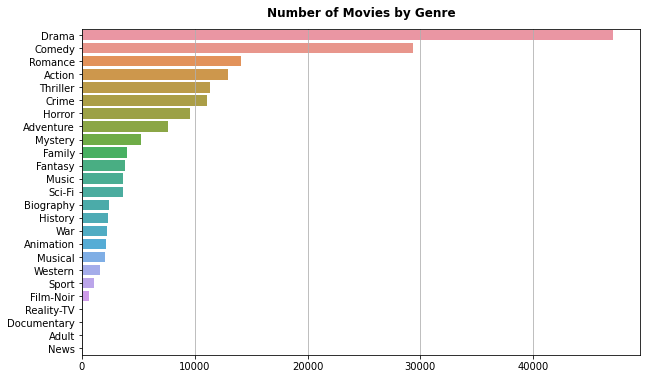

In [42]:
num_genre = df_yg_g.sum().sort_values(ascending=False)[1:]

fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(num_genre.values, num_genre.index, ax=ax)
ax.set_title("Number of Movies by Genre", fontsize="large", fontweight="bold", pad=12)
ax.grid(axis="x")
fig.savefig("streamgraph_07.png")

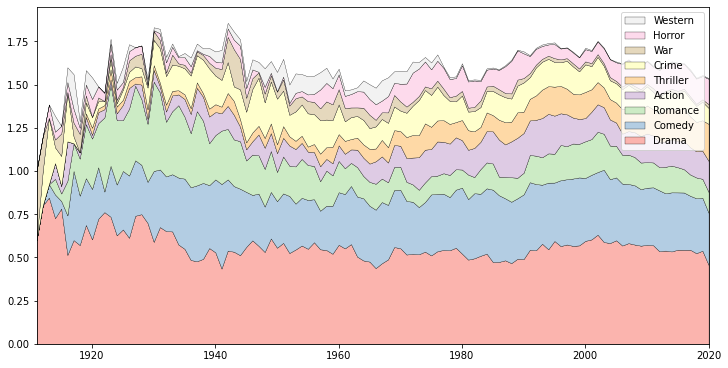

In [45]:
genres_sel = ['Drama', 'Comedy', 'Romance', 'Action', 'Thriller', 'Crime', 'War', 'Horror', 'Western']

fig, ax = plt.subplots(figsize=(10, 5),
                       constrained_layout=True)

ax.stackplot(df_yg_g.index, 
             [df_yg_g[genre]/df_yg_g["num_movie"] for genre in genres_sel],
             labels = genres_sel, ec="k", lw=0.3)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-1])
ax.set_xlim(df_yg_g.index.min(), df_yg_g.index.max())
fig.savefig("streamgraph_08.png")

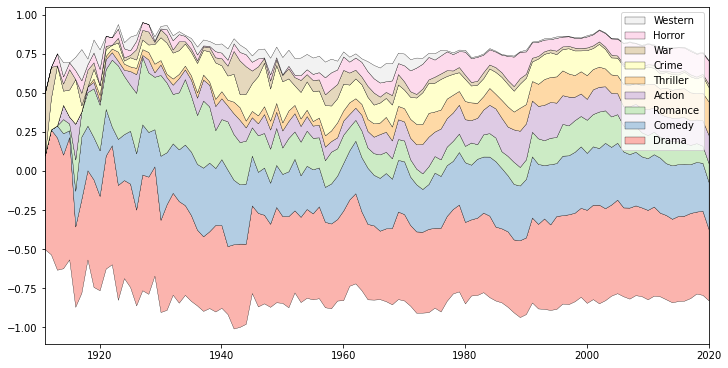

In [46]:
# sns.set_palette("tab10")

fig, ax = plt.subplots(figsize=(10, 5),
                       constrained_layout=True)

ax.stackplot(df_yg_g.index, 
             [df_yg_g[genre]/df_yg_g["num_movie"] for genre in genres_sel],
             labels = genres_sel, ec="k", lw=0.3,
             baseline='weighted_wiggle')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-1])
ax.set_xlim(df_yg_g.index.min(), df_yg_g.index.max())
fig.savefig("streamgraph_09.png")

In [48]:
df_yg_gs = df_yg_g.rolling(3, win_type='gaussian').mean(std=2)
df_yg_gs.loc[1911] = df_yg_g.loc[1911]
df_yg_gs.loc[1912] = df_yg_g.loc[1912]

df_yg_gs.head(3)

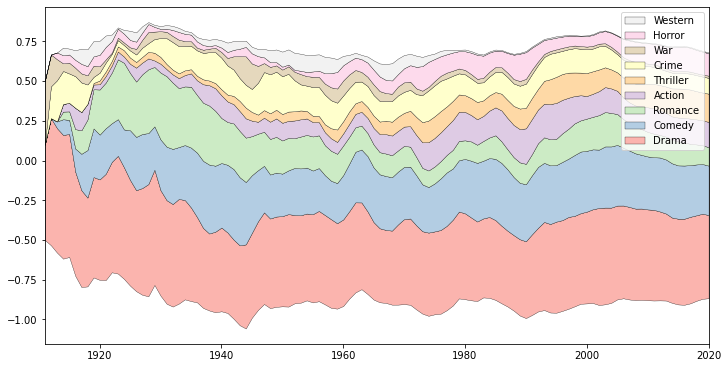

In [50]:
fig, ax = plt.subplots(figsize=(10, 5),
                       constrained_layout=True)

ax.stackplot(df_yg_g.index, 
             [df_yg_gs[genre]/df_yg_gs["num_movie"] for genre in genres_sel],
             labels = genres_sel, ec="k", lw=0.3,
             baseline='weighted_wiggle')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-1])
ax.set_xlim(df_yg_g.index.min(), df_yg_g.index.max())
fig.savefig("streamgraph_11.png")

In [52]:
for genre in genres:
    df_yg_g[f"order_{genre}"] = np.zeros(df_yg_gs.shape[0], dtype='int')

for idx in df_yg_gs.index:
    for order, genre in enumerate(df_yg_gs.loc[idx, genres].sort_values(ascending=False).index, 1):
        df_yg_g.loc[idx, f"order_{genre}"] = order

df_yg_g

,num_movie,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,order_Musical,order_Mystery,order_News,order_Reality-TV,order_Romance,order_Sci-Fi,order_Sport,order_Thriller,order_War,order_Western
year,,,,,,,,,,,,,,,,,,,,,
1911,5,0,0,1,0,0,0,0,0,3,...,14,13,12,11,10,9,8,7,2,25
1912,5,0,0,0,0,1,0,1,0,4,...,14,6,13,12,11,10,9,8,3,25
1913,13,0,0,2,0,0,1,5,0,11,...,18,7,16,15,14,10,13,12,5,25
1914,22,2,0,4,0,0,3,2,0,16,...,19,7,21,22,10,14,23,24,9,13
1915,23,1,0,3,0,1,1,4,0,18,...,20,12,21,22,9,15,23,24,7,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,3138,516,0,239,100,121,1040,332,0,1707,...,19,9,21,22,6,11,17,3,18,20
2017,3329,524,0,262,108,121,1040,342,0,1812,...,19,9,21,22,6,11,17,3,18,20
2018,3257,493,0,240,112,131,1035,304,0,1708,...,19,9,21,22,6,11,17,3,18,20


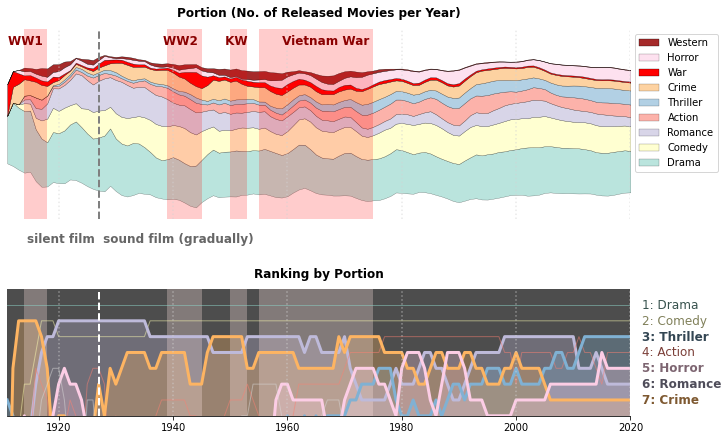

In [92]:
from matplotlib import colors as mcolor
sns.set_palette("Set3", 10)

genres_sel = ['Drama', 'Comedy', 'Romance', 'Action', 'Thriller', 'Crime', 'War', 'Horror', 'Western']

top7_2020 = df_yg_gs.iloc[-1][genres].sort_values(ascending=False)[:7].index

fig, axs = plt.subplots(nrows=2, 
                        gridspec_kw={"height_ratios":[6, 4], "hspace":0.1},
                        sharex=True,
                        figsize=(10, 6),
                        constrained_layout=True)

# streamgraph: number of release
axs[0].stackplot(df_yg_g.index, 
             [df_yg_gs[genre]/df_yg_gs["num_movie"] for genre in genres_sel],
             labels = genres_sel, ec="k", lw=0.3, alpha=0.6, 
             baseline='weighted_wiggle')

# War, Western 강조
idx_War = genres_sel.index("War")
axs[0].get_children()[idx_War].set_facecolor("red")
axs[0].get_children()[idx_War].set_alpha(1)
idx_Western = genres_sel.index("Western")
axs[0].get_children()[idx_Western].set_facecolor("brown")
axs[0].get_children()[idx_Western].set_alpha(1)

# legend on streamgraph
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles[::-1], labels=labels[::-1], 
          loc="upper left", bbox_to_anchor=(1,1))

# x, y limit
axs[0].set_xlim(df_yg_g.index.min(), df_yg_g.index.max())
axs[0].set_ylim(-1.2, 1.2)
axs[0].axis(False)

# line plot: rank of genre
def color_darker(CN, offset=0.5):
    c_rgb = mcolor.to_rgb(CN)
    c_hsv = mcolor.rgb_to_hsv(c_rgb)
    c_hsv[2] = c_hsv[2] - offset if c_hsv[2] >= offset else 0
    return mcolor.hsv_to_rgb(c_hsv)
    
for i, genre in enumerate(genres_sel):
    alpha, lw, fontweight, offset = 0.5, 1, "normal", 0.5
    if genre == "War":
        continue
    
    if genre in ["Romance", "Thriller", "Crime", "Horror"]:
        alpha, lw, fontweight, offset = 1, 3, "bold", 0
        axs[1].fill_between(df_yg_g.index, df_yg_g[f"order_{genre}"], 10, 
                            fc=f"C{i}", alpha=0.3)
        
    axs[1].plot(df_yg_g[f"order_{genre}"], 
                alpha=alpha, lw=lw, c=color_darker(f"C{i}", 0))
    
    if genre in top7_2020:
        rank = np.where(top7_2020 == genre)[0][0]
        axs[1].text(df_yg_g.index.values[-1]+2, df_yg_g[f"order_{genre}"].values[-1], 
                    f"{rank+1}: {genre}",
                    transform=axs[1].transData,
                    va="center", color=color_darker(f"C{i}", 0.5), 
                    fontsize="large", fontweight=fontweight, alpha=1
                   )

# y axis and spines
axs[1].set_ylim(0, 8)
axs[1].invert_yaxis()
axs[1].yaxis.set_visible(False)
axs[1].spines[["left", "top", "right"]].set_visible(False)

# dark background
axs[1].set_facecolor("0.3")

# titles
font_title={"fontsize":"large", "fontweight":"bold"}
axs[0].set_title("Portion (No. of Released Movies per Year)", fontdict=font_title, pad=12)
axs[1].set_title("Ranking by Portion", fontdict=font_title, pad=12)

# grids
for ax in axs:
    xticks = ax.get_xticks()
    [ax.axvline(x, c="lightgray", ls=":", alpha=0.5) for x in xticks]

# world war
[axs[0].axvspan(*x, fc="red", alpha=0.2) for x in [(1914, 1918), (1939, 1945)]]
[axs[1].axvspan(*x, fc="mistyrose", alpha=0.3) for x in [(1914, 1918), (1939, 1945)]]
axs[0].text(1918, 1.0, "WW1 ", c="darkred", fontsize="large", fontweight="bold", ha="right")    
axs[0].text(1945, 1.0, "WW2 ", c="darkred", fontsize="large", fontweight="bold", ha="right")    

# Korean war
axs[0].axvspan(1950, 1953, fc="red", alpha=0.2)
axs[1].axvspan(1950, 1953, fc="mistyrose", alpha=0.3)
axs[0].text(1953, 1.0, " KW", c="darkred", fontsize="large", fontweight="bold", ha="right")    

# Korean war
axs[0].axvspan(1955, 1975, fc="red", alpha=0.2)
axs[1].axvspan(1955, 1975, fc="mistyrose", alpha=0.3)
axs[0].text(1975, 1.0, " Vietnam War ", c="darkred", fontsize="large", fontweight="bold", ha="right")    

# sound film
axs[0].axvline(1927, c="0.5", ls="--", lw=2)
axs[1].axvline(1927, c="w", ls="--", lw=2)
axs[0].text(1927, -1.5, "silent film ", c="0.4", fontsize="large", fontweight="bold", ha="right")
axs[0].text(1927, -1.5, " sound film (gradually) ", c="0.4", fontsize="large", fontweight="bold", ha="left")

fig.set_facecolor("w")
fig.savefig("streamgraph.png")